In [ ]:
from tensorflow.keras.datasets import mnist #Библиотека с базой Mnist
from tensorflow.keras.models import Sequential # Подлючаем класс создания модели Sequential
from tensorflow.keras.layers import Dense # Подключаем класс Dense - полносвязный слой
from tensorflow.keras.optimizers import Adam # Подключаем оптимизатор Adam
from tensorflow.keras import utils #Утилиты для to_categorical
from tensorflow.keras.preprocessing import image #Для отрисовки изображения
import numpy as np # Подключаем библиотеку numpy
import pandas as pd # Подключаем библиотеку Pandas
import pylab # Модуль для построения графиков
from mpl_toolkits.mplot3d import Axes3D # Модуль для трехмерной графики
from google.colab import files #Для загрузки своей картинки
import matplotlib.pyplot as plt #Отрисовка изображений
from PIL import Image #Отрисовка изображений
#Отрисовывать изображения в ноутбуке, а не в консоль или файл
%matplotlib inline 

# Light

Вариант 2

Проведите серию экспериментов по перебору гиперпараметров нейронной сети, созданной на занятии.
Поменяйте количество нейронов в сети, используя следующие значения:


* Один слой 10 нейронов
* Один слой 100 нейронов
* Один слой 5000 нейронов


Поменяйте активационную функцию в скрытых слоях с relu на linear.


Поменяйте размеры batch_size:


* 1
* 10
* 100
* Вся база (60000)


Запишите в таблицу получившиеся точности.
Напишите выводы по результатам проведенных тестов.


In [ ]:
# Загрузка данных
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()

# Меняем формат входных картинок с 28х28 на 784х1
x_train = x_train_org.reshape(60000, 784)
x_test = x_test_org.reshape(10000, 784)

# Нормализуем данные
x_train = x_train.astype('float32') # преобразовываем x_train в тип float (цифры с плавающей точкой)
x_train = x_train / 255 # делим на 255, чтобы диапазон был от 0 до 1
x_test = x_test.astype('float32') # преобразовываем x_test в тип float (цифры с плавающей точкой)
x_test = x_test / 255 # делим на 255, чтобы диапазон был от 0 до 1

# Преобразуем ответы в формат one_hot_encoding
y_train = utils.to_categorical(y_train_org, 10)
y_test = utils.to_categorical(y_test_org, 10)


11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
# Проверяем размеры
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


In [ ]:
# Модель
model_sample = Sequential() # Создаём сеть прямого распространения
model_sample.add(Dense(800, input_dim=784, activation='relu')) # Добавляем полносвязный слой на 800 нейронов с relu-активацией
model_sample.add(Dense(10, activation='softmax')) # Добавляем полносвязный слой на 10 нейронов с softmax-активацией

model_sample.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # Компилируем модель

# Обучение сети

# fit - функция обучения нейронки
# x_train, y_train - обучающая выборка, входные и выходные данные
# batch_size - размер батча, количество примеров, которое обрабатывает нейронка перед одним изменением весов
# epochs - количество эпох, когда нейронка обучается на всех примерах выборки
# verbose - 0 - не визуализировать ход обучения, 1 - визуализировать
model_sample.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 1s 3ms/step - loss: 0.2797 - accuracy: 0.9196 - val_loss: 0.1454 - val_accuracy: 0.9585
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1105 - accuracy: 0.9678 - val_loss: 0.1078 - val_accuracy: 0.9668
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0698 - accuracy: 0.9796 - val_loss: 0.0938 - val_accuracy: 0.9720
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0490 - accuracy: 0.9860 - val_loss: 0.0929 - val_accuracy: 0.9713
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0347 - accuracy: 0.9898 - val_loss: 0.0761 - val_accuracy: 0.9761
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0245 - accuracy: 0.9935 - val_loss: 0.0759 - val_accuracy: 0.9782
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0174 - accuracy: 0.9958 - val_loss: 0.0770 - val_accuracy: 0.9778
Epoch 

In [ ]:
model_sample.evaluate(x_test, y_test)[1]

313/313 [==============================] - 1s 2ms/step - loss: 0.0653 - accuracy: 0.9809


0.98089998960495

In [ ]:
data = [[800, 'relu', 128, round(model_sample.evaluate(x_test, y_test, verbose = 0)[1], 3)]]
data

[[800, 'relu', 128, 0.981]]

In [ ]:
# 1
N = [10, 100, 5000] # Кол-во нейронов в скрытом слое
for i in N:
    model = Sequential() 
    model.add(Dense(i, input_dim=784, activation='relu')) # Добавляем полносвязный слой на N нейронов
    model.add(Dense(10, activation='softmax')) 

    # Компилируем модель
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

    # Обучение сети
    model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_split=0.2)

    data = data + [[i, 'relu', 128, round(model.evaluate(x_test, y_test, verbose = 0)[1], 3)]]


# 2
model = Sequential() 
model.add(Dense(800, input_dim=784, activation='linear')) # Меняем активационную функцию на 'linear'
model.add(Dense(10, activation='softmax')) 

# Компилируем модель
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

# Обучение сети
model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_split=0.2)

data = data + [[800, 'linear', 128, round(model.evaluate(x_test, y_test, verbose = 0)[1], 3)]]


# 3
N_batch_size = [1, 10, 100, 60000]
for i in N_batch_size:
    model = Sequential() # Создаём сеть прямого распространения
    model.add(Dense(800, input_dim=784, activation='relu')) 
    model.add(Dense(10, activation='softmax')) 

    # Компилируем модель
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

    # Обучение сети
    model.fit(x_train, y_train, batch_size=i, epochs=10, verbose=1, validation_split=0.2)  # Меняем batch_size

    data = data + [[800, 'relu', i, round(model.evaluate(x_test, y_test, verbose = 0)[1], 3)]]

Epoch 1/10
375/375 [==============================] - 1s 3ms/step - loss: 0.8836 - accuracy: 0.7392 - val_loss: 0.3902 - val_accuracy: 0.8949
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.3623 - accuracy: 0.8992 - val_loss: 0.3014 - val_accuracy: 0.9170
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.3087 - accuracy: 0.9124 - val_loss: 0.2745 - val_accuracy: 0.9239
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.2856 - accuracy: 0.9195 - val_loss: 0.2649 - val_accuracy: 0.9263
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.2713 - accuracy: 0.9234 - val_loss: 0.2556 - val_accuracy: 0.9288
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.2615 - accuracy: 0.9265 - val_loss: 0.2502 - val_accuracy: 0.9301
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.2528 - accuracy: 0.9289 - val_loss: 0.2444 - val_accuracy: 0.9315
Epoch 

In [ ]:
df = pd.DataFrame(data, columns = ['neurons', 'activation', 'batch_size','val_accuracy'])
df

,neurons,activation,batch_size,val_accuracy
0,800,relu,128,0.981
1,10,relu,128,0.932
2,100,relu,128,0.976
3,5000,relu,128,0.983
4,800,linear,128,0.917
5,800,relu,1,0.973
6,800,relu,10,0.979
7,800,relu,100,0.980
8,800,relu,60000,0.872


In [ ]:
# Выводы: 

# Pro

Распознайте рукописную цифру, созданную вами с помощью графического редактора (например, Paint).

Последовательность шагов:

В графическом редакторе рисуем произвольную цифру.
Сохраняем документ и загружаем его в Collaboratory.
С помощью функции image.load_img(path, target_size=(28, 28), color_mode = ‘grayscale’) загружаем картинку в переменную.
С помощью функции image.img_to_array(img) преобразуем изображение в numpy-массив.
Выполняем инверсию цветов, нормирование и решейп массива.


Выполняем распознавание собственной рукописной цифры.

Реализуйте тот же алгоритм для написанной на листе от руки цифры (для этого необходимо сделать дополнительную предобработку изображения).



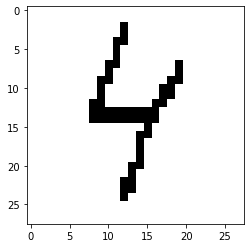

In [ ]:
# Загружаем картинку сделанную в графическом редакторе
example = image.load_img('/content/4_.png', target_size=(28, 28), color_mode = 'grayscale') 

# Нарисуем картинку
plt.imshow(example.convert('RGBA')) 
plt.show()

In [ ]:
# Нормализуем данные
example = image.img_to_array(example) # преобразуем изображение в numpy-массив
example = example.reshape(1,784)
example = example.astype('float32')
example = 1- example/255

In [ ]:
#Распознаём наш пример
pred_example = model_sample.predict(example)
print(pred_example)

[[8.7782714e-09 8.3022212e-07 1.2345195e-06 1.3279305e-04 9.8141897e-01
  1.3637092e-04 3.4444900e-05 4.0913419e-05 8.5871518e-03 9.6471692e-03]]


In [ ]:
# Получаем индекс самого большого элемента (это итоговая цифра, которую распознала сеть)
pred = np.argmax(pred_example)
print(pred)

4


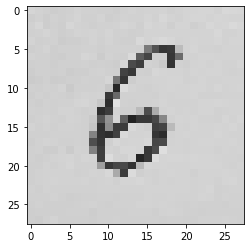

In [ ]:
# Загружаем картинку нарисованную на листе бумаги
example = image.load_img('/content/6_.png', target_size=(28, 28), color_mode = 'grayscale') 

# Нарисуем картинку
plt.imshow(example.convert('RGBA')) 
plt.show()

In [ ]:
example = image.img_to_array(example)
example = example.reshape(1,784)
print(example)

[[213. 210. 208. 205. 207. 208. 211. 209. 209. 208. 208. 206. 209. 211.
  209. 210. 210. 211. 208. 210. 212. 212. 213. 213. 210. 216. 215. 214.
  206. 209. 205. 209. 207. 209. 212. 208. 208. 211. 206. 208. 210. 209.
  209. 212. 209. 215. 211. 209. 212. 213. 213. 211. 213. 212. 211. 211.
  209. 214. 205. 208. 206. 214. 210. 209. 207. 209. 209. 210. 213. 211.
  207. 214. 211. 212. 207. 212. 212. 207. 210. 215. 212. 213. 217. 214.
  208. 209. 212. 209. 206. 208. 211. 210. 211. 209. 212. 208. 209. 207.
  208. 211. 211. 211. 211. 211. 211. 211. 211. 211. 215. 210. 210. 212.
  211. 207. 208. 209. 204. 206. 206. 208. 211. 208. 211. 208. 207. 207.
  216. 211. 214. 217. 214. 210. 211. 212. 211. 211. 213. 210. 212. 212.
  206. 208. 211. 206. 208. 208. 208. 209. 209. 207. 209. 209. 209. 209.
  208. 122.  83.  55.  59. 188. 211. 213. 210. 210. 209. 211. 211. 211.
  210. 208. 208. 206. 205. 208. 208. 213. 211. 204. 210. 208. 207. 217.
   92.  68. 209. 209.  55. 107. 210. 210. 212. 212. 211. 211. 21

In [ ]:
example = np.where(example > 100, 255, example) # По условию меняем значения в масиве
example

array([[255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
        255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
        255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
        255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
        255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
        255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
        255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
        255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
        255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
        255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
        255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
        255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
        255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
        255., 255., 255., 255., 255., 

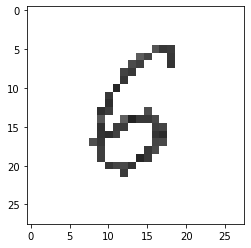

In [ ]:
plt.imshow(Image.fromarray(example.reshape(28,28)).convert('RGBA')) # Нарисуем картинку после обработки
plt.show()

In [ ]:
# Нормализуем данные
example = example.astype('float32')
example = 1 - example/255 # Делаем инверсию, чтобы было не черное на белом, а белая цифра на черном фоне

In [ ]:
#Распознаём наш пример
pred_example = model_sample.predict(example)
print(pred_example)

[[3.7810914e-04 2.7576803e-05 4.5037396e-02 7.6707496e-05 5.4097213e-03
  3.4460474e-03 9.4286102e-01 1.7722134e-05 2.5518632e-03 1.9384034e-04]]


In [ ]:
# Получаем индекс самого большого элемента (это итоговая цифра, которую распознала сеть)
pred = np.argmax(pred_example)
print(pred)

6
